## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_1/solution.ipynb).

In [75]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

In [76]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [77]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = useducation["STATE"].unique()

for state in states:
    useducation.loc[:, col] = useducation.loc[:, col].interpolate()

In [78]:
useducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [79]:
useducation.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,7.478782e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.291585e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.718665e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,4.591248e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,8.860948e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [80]:
useducation["winsorized_TOTAL_REVENUE"] = winsorized_views = winsorize(useducation["TOTAL_REVENUE"], (0.05, 0.05))
useducation["winsorized_TOTAL_EXPENDITURE"] = winsorized_views = winsorize(useducation["TOTAL_EXPENDITURE"], (0.05, 0.05))

In [81]:
useducation.describem()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorized_TOTAL_REVENUE,winsorized_TOTAL_EXPENDITURE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.00000,1.361000e+03,1.361000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000,1.280000e+03,1.280000e+03
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,54268.92432,5.192140e+05,2.470714e+05,7.478782e+05,234.768293,278.414711,218.866154,263.661132,9.104632e+06,9.208769e+06
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,67889.27623,6.436384e+05,3.077056e+05,9.291585e+05,10.221511,10.159722,7.769616,6.803725,1.173637e+07,1.196969e+07
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,1.004472e+06,9.938230e+05
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,10919.00000,1.106260e+05,5.147100e+04,1.718665e+05,229.694352,272.761598,214.663401,259.533171,2.186305e+06,2.165404e+06
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,36735.00000,3.457750e+05,1.642600e+05,4.591248e+05,237.238552,280.618803,220.416034,265.010912,5.079546e+06,5.234506e+06
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,67460.00000,6.119050e+05,2.905020e+05,8.860948e+05,241.995486,285.347428,223.999337,268.190121,1.085985e+07,1.074519e+07
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,8.921726e+07,8.532013e+07


**Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.**

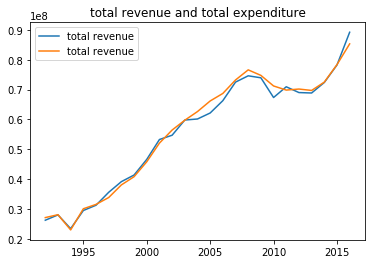

In [82]:

plt.plot(useducation.loc[useducation.STATE == "CALIFORNIA", "YEAR"],
         useducation.loc[useducation.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(useducation.loc[useducation.STATE == "CALIFORNIA", "YEAR"],
         useducation.loc[useducation.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="total revenue")
plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

**In your chosen state, which of the lessons are the students more successful, math or reading?**

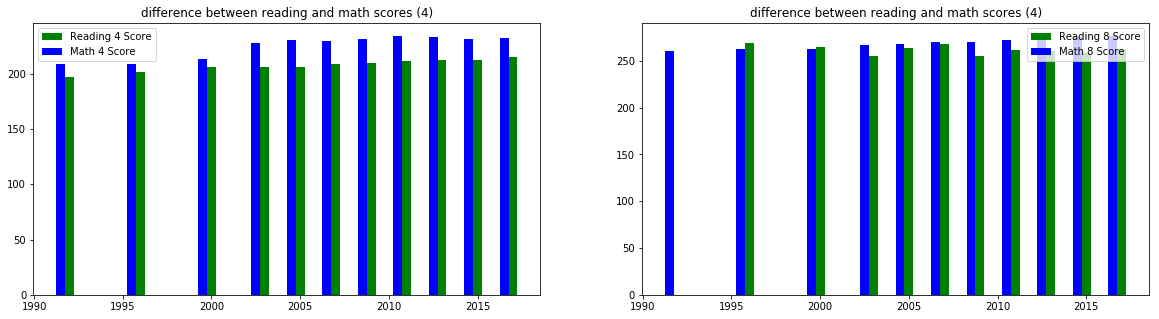

difference between reading and math scores (4)
4      -11.634547
56            NaN
108           NaN
161           NaN
213     -7.216492
264           NaN
316           NaN
367           NaN
420     -7.648537
472           NaN
524           NaN
576    -21.822545
628           NaN
680    -23.854931
731           NaN
784    -21.511905
836           NaN
891    -21.912522
944           NaN
997    -22.806357
1048          NaN
1101   -21.108497
1152          NaN
1203   -18.871396
1254          NaN
1451   -16.841127
dtype: float64
difference between reading and math scores (8)
4             NaN
56            NaN
108           NaN
161           NaN
213      6.424972
264           NaN
316           NaN
367           NaN
420      2.323040
472           NaN
524           NaN
576    -11.976121
628           NaN
680     -4.373619
731           NaN
784     -2.222356
836           NaN
891    -15.553342
944           NaN
997    -11.484551
1048          NaN
1101   -15.453063
1152          NaN
1203   -1

In [85]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(useducation.loc[useducation.STATE == "CALIFORNIA", "YEAR"],
         useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"], 
         width =0.5, label='Reading 4 Score', color='green')
plt.bar(useducation.loc[useducation.STATE == "CALIFORNIA", "YEAR"]-0.5,
         useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"],
         width =0.5, label='Math 4 Score', color='blue')
plt.title("difference between reading and math scores (4)")
plt.legend()

plt.subplot(1,2,2)
plt.bar(useducation.loc[useducation.STATE == "CALIFORNIA", "YEAR"],
         useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"], 
         width =0.5, label='Reading 8 Score', color='green')
plt.bar(useducation.loc[useducation.STATE == "CALIFORNIA", "YEAR"]-0.5,
         useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"],
         width =0.5, label='Math 8 Score', color='blue')
plt.title("difference between reading and math scores (4)")
plt.legend()
plt.show()

print("difference between reading and math scores (4)")
print(useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - useducation.loc[useducation.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])


**What are the distributions of the math and reading scores in the sample?**

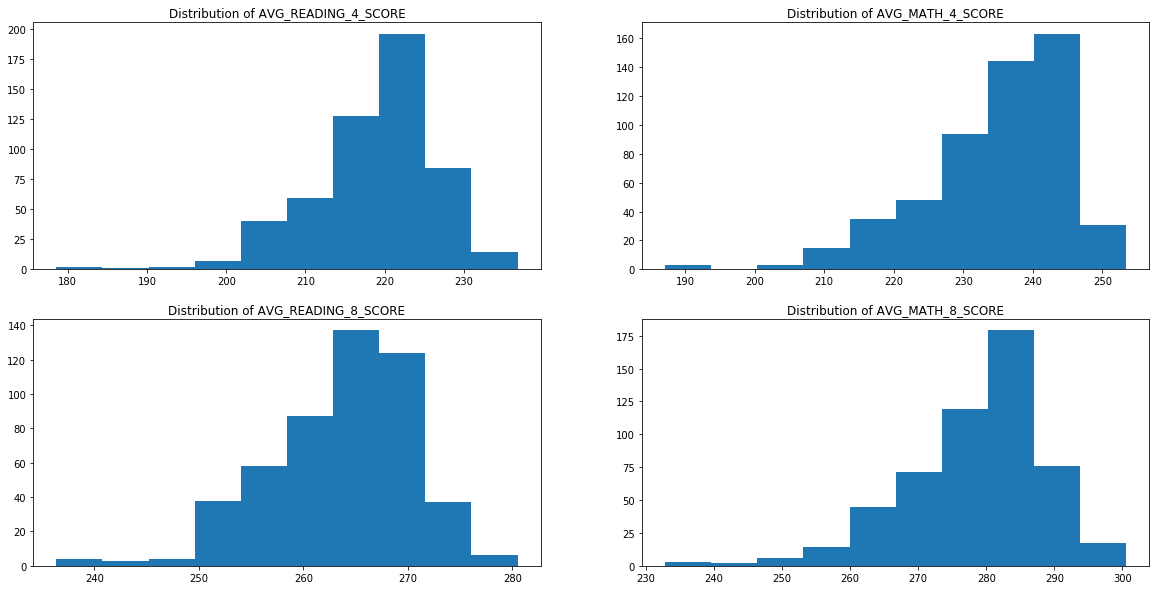

In [88]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(useducation.AVG_READING_4_SCORE)
plt.title("Distribution of AVG_READING_4_SCORE")

plt.subplot(2,2,2)
plt.hist(useducation.AVG_MATH_4_SCORE)
plt.title("Distribution of AVG_MATH_4_SCORE")

plt.subplot(2,2,3)
plt.hist(useducation.AVG_READING_8_SCORE)
plt.title("Distribution of AVG_READING_8_SCORE")

plt.subplot(2,2,4)
plt.hist(useducation.AVG_MATH_8_SCORE)
plt.title("Distribution of AVG_MATH_8_SCORE")

plt.show()

The distributions are not normal distribution but slightly skewed to the left both for reading and writing. This means that average of the scores are lower than the median.

**Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.**

In [89]:
useducation2 = useducation.copy()

useducation2["AVG_MATH_4_SCORE"].fillna(useducation2["AVG_MATH_4_SCORE"].mean(), inplace=True)
useducation2["AVG_MATH_8_SCORE"].fillna(useducation2["AVG_MATH_8_SCORE"].mean(), inplace=True)
useducation2["AVG_READING_4_SCORE"].fillna(useducation2["AVG_READING_4_SCORE"].mean(), inplace=True)
useducation2["AVG_READING_8_SCORE"].fillna(useducation2["AVG_READING_8_SCORE"].mean(), inplace=True)

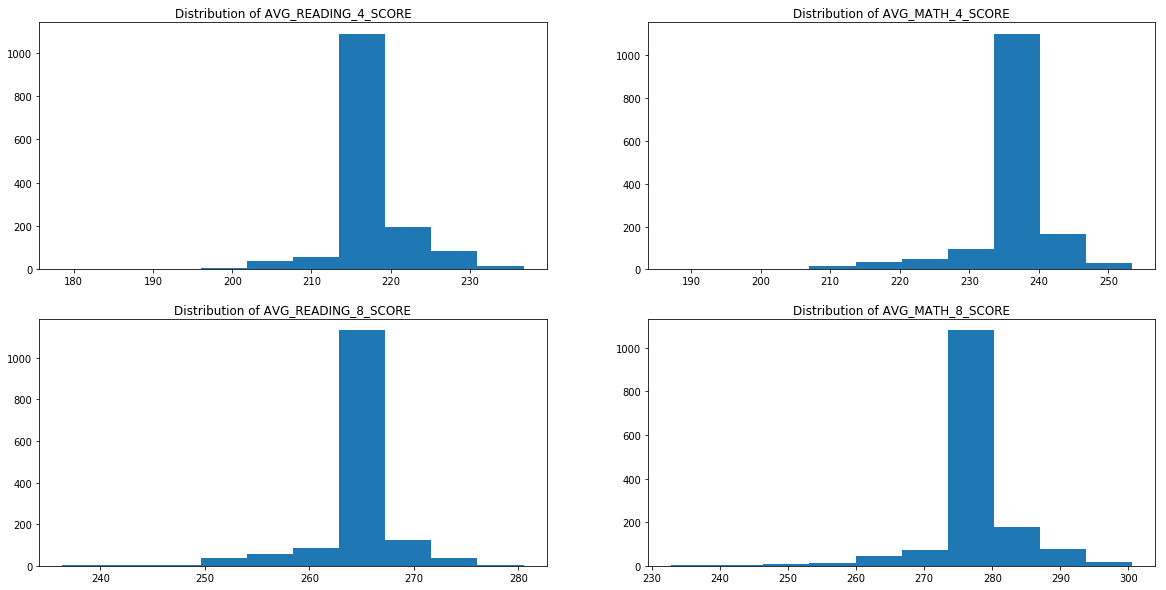

In [90]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(useducation2.AVG_READING_4_SCORE)
plt.title("Distribution of AVG_READING_4_SCORE")

plt.subplot(2,2,2)
plt.hist(useducation2.AVG_MATH_4_SCORE)
plt.title("Distribution of AVG_MATH_4_SCORE")

plt.subplot(2,2,3)
plt.hist(useducation2.AVG_READING_8_SCORE)
plt.title("Distribution of AVG_READING_8_SCORE")

plt.subplot(2,2,4)
plt.hist(useducation2.AVG_MATH_8_SCORE)
plt.title("Distribution of AVG_MATH_8_SCORE")

plt.show()

Replacing na values with mean creates significant problems with our data due to so many missing values. Lets try replacing values using interpolate to see what happens.

In [91]:
useducation3 = useducation.copy()

useducation3["AVG_MATH_4_SCORE"].fillna(useducation3["AVG_MATH_4_SCORE"].interpolate(), inplace=True)
useducation3["AVG_MATH_8_SCORE"].fillna(useducation3["AVG_MATH_8_SCORE"].interpolate(), inplace=True)
useducation3["AVG_READING_4_SCORE"].fillna(useducation3["AVG_READING_4_SCORE"].interpolate(), inplace=True)
useducation3["AVG_READING_8_SCORE"].fillna(useducation3["AVG_READING_8_SCORE"].interpolate(), inplace=True)

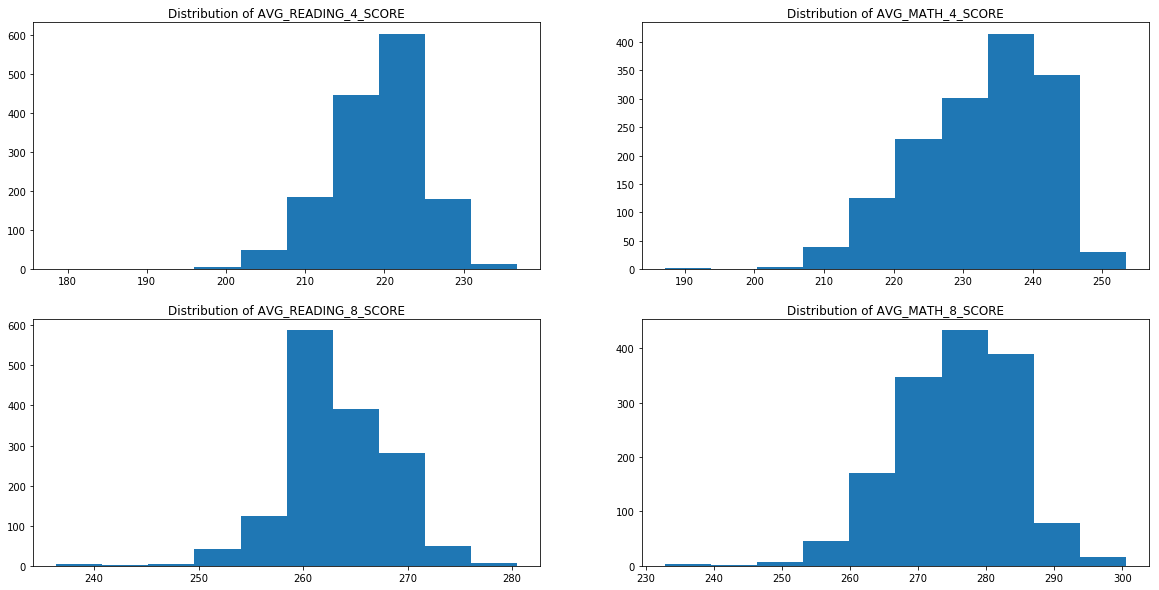

In [92]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(useducation3.AVG_READING_4_SCORE)
plt.title("Distribution of AVG_READING_4_SCORE")

plt.subplot(2,2,2)
plt.hist(useducation3.AVG_MATH_4_SCORE)
plt.title("Distribution of AVG_MATH_4_SCORE")

plt.subplot(2,2,3)
plt.hist(useducation3.AVG_READING_8_SCORE)
plt.title("Distribution of AVG_READING_8_SCORE")

plt.subplot(2,2,4)
plt.hist(useducation3.AVG_MATH_8_SCORE)
plt.title("Distribution of AVG_MATH_8_SCORE")

plt.show()